# Running a simple program through real Quantum Computer

## Executing a program in Simulator (AerSimulator)

Measurement Results: {'00': 499, '11': 525}


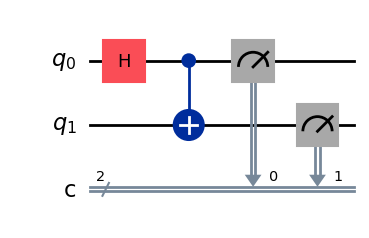

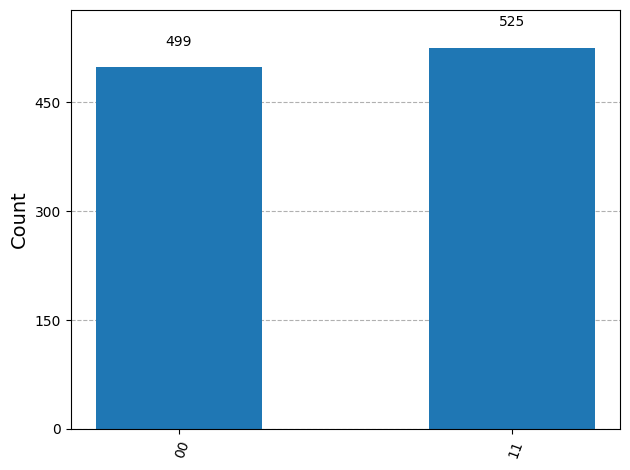

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

%matplotlib inline
# -------------------------------
# STEP 1: Create a Quantum Circuit
# Example: Bell State Circuit
# -------------------------------

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

qc.draw("mpl")  # Optional: shows circuit diagram

#STEP 2: Select the simulator
simulator = AerSimulator()

# STEP 3: Transpile the Circuit for the Simulator

transpiled_qc = transpile(qc, backend=simulator, optimization_level=3)

# STEP 4: Run the Circuit on the Simulator

job = simulator.run(transpiled_qc, shots=1024)

# STEP 5: Retrieve and Display Results

result = job.result()
counts = result.get_counts()

print("Measurement Results:", counts)
plot_histogram(counts)
plt.show()



Theoretical result should be half and half. Means 499 for |00> and 525 for |11> states. But due to errors, we find there are not equal. The probabilties are 0.4658 for |00> state and 0.5342 for |11> state.

## Running the same program in real Quantum Computer

#### Setting up the account (Initialization)

Save Your Token in Qiskit

For this, you need to create an account in IBM Quantum Cloud. From the account, you find token and instance.

For "token", click on "Access(IAM)" present in "Manage" option. Then, click on "API keys" present on sidebar of site. Then, click on "create" API key to create new API key. After creating, you will find your token.

For instance, click on "https://quantum.cloud.ibm.com/instances" (login with same credentials) and then click on "create" instance.


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_cloud", token="h7EB2SGF-uUbCxYnhDB3_cIDwKmLaYGlXPmwTFhkoQsD",instance = "crn:v1:bluemix:public:quantum-computing:us-east:a/ee7facfcce9b47bb9b4b678661d0af5f:28256104-eca4-4c1e-be6f-7c84869b9e51::",overwrite = True)


#### Using IBMProvider (for older versions)

Load the Provider in Future Sessions

In [14]:
provider = IBMProvider()

Checking available backends 

In [15]:
print([backend.name for backend in provider.backends()])


['ibm_brisbane', 'ibm_sherbrooke']


Implemeting same program in real quantum computer

In [18]:
# -------------------------------
# STEP 0: Install Required Packages (if needed)
# pip install qiskit qiskit-ibm-provider matplotlib
# -------------------------------

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram
#from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt

# -------------------------------
# STEP 1: Save and Load Your IBM Token
# NOTE: Only run save_account() ONCE. Comment it afterward.
# -------------------------------

# Replace with your IBM Quantum token
# IBMProvider.save_account(token="YOUR_IBM_QUANTUM_TOKEN", overwrite=True)

# Load your account and provider
provider = IBMProvider()

# -------------------------------
# STEP 2: Choose Backend
# Use either a real quantum device or simulator
# -------------------------------

# For real hardware (may have queue):
backend = provider.get_backend("ibm_brisbane")

# For fast simulator testing:
# backend = provider.get_backend("ibmq_qasm_simulator")

# -------------------------------
# STEP 3: Create a Quantum Circuit
# Example: Bell State Circuit
# -------------------------------

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

qc.draw("mpl")  # Optional: shows circuit diagram

# -------------------------------
# STEP 4: Transpile the Circuit for the Backend
# -------------------------------

transpiled_qc = transpile(qc, backend=backend, optimization_level=3)

# -------------------------------
# STEP 5: Run the Circuit on the Backend
# -------------------------------

job = backend.run(transpiled_qc, shots=1024)
#job.status()  # Track job status

# -------------------------------
# STEP 6: Retrieve and Display Results
# -------------------------------

result = job.result()
counts = result.get_counts()

print("Measurement Results:", counts)
plot_histogram(counts)
plt.show()


IBMBackendApiError: 'Error submitting job: \'404 Client Error: Not Found for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"code":1211,"message":"Program not found.","solution":"Make sure you use a valid program name, such as \\\'sampler\\\' or \\\'estimator\\\'. Qiskit Runtime no longer supports the \\\'backend.run\\\' interface. Refer to the migration guide (https://docs.quantum.ibm.com/migration-guides/qiskit-runtime) for instructions to migrate to the primitives.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

Because of Qiskit changes, IBM Provider is not needed to load your account. It can be done using QiskitIBMruntime only.

#### Using QiskitIBMruntime (for new versions)

In [8]:
#print available real devices
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

for backend in service.backends(simulator=False):
    print(backend.name)


ibm_brisbane
ibm_sherbrooke
ibm_torino


In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit,transpile

# Load your saved account
service = QiskitRuntimeService()

# Choose a real backend
backend = service.backend("ibm_brisbane")  # Or another available backend (to check these, one can check their IBM account) 

# Create your circuit
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

#transpile
tqc = transpile(qc, backend=backend)

# Create a sampler for running the circuit
sampler = Sampler(mode=backend)
job = sampler.run([tqc])

# Get and print result
result = job.result()
print(result)


PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-07-03 00:13:07', stop='2025-07-03 00:13:09', size=4096>)])}, 'version': 2})


In the above, we obtain the result as PrimtiveResult object. In the below, we obtain the same result as obtained in a simulator.

In [6]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from collections import Counter

# Assuming 'result' is your PrimitiveResult object
pub_result = result[0]  # Access the first (and only) PUB result

# Extract the BitArray from the data
bitarray = pub_result.data.c

print(bitarray)

counts = bitarray.get_counts()
total = sum(counts.values())
probabilities = {b: c/total for b, c in counts.items()}

print("Counts:", counts)
print("Probabilities:")
for b, p in probabilities.items():
    print(f"{b}: {p:.4f}")


BitArray(<shape=(), num_shots=4096, num_bits=2>)
Counts: {'00': 1968, '11': 2010, '01': 34, '10': 84}
Probabilities:
00: 0.4805
11: 0.4907
01: 0.0083
10: 0.0205


Theoretically, there shouldn't be any nonzero probabilty for |01> and |10> states. Due to quantum errors, we see a nonzero values in those states. As for |00> and |11> states, the probabilties are 0.4805 and.0.4907, respectively.